# Speedrun\.com API in Python

By Jay G. Crawford, Michael T. Moen, and Avery Fernandez

The Speedrun\.com API is a web-based service provided by Speedrun\.com, the largest community and resource for speedrunning video games. Speedrunning is the practice of completing a game or a portion of it as quickly as possible, often with specific rules or categories. The Speedrun\.com API enables developers to access and interact with the extensive database of speedrun records, leaderboards, games, categories, users, and more hosted on the Speedrun\.com platform.

Please see the following resources for more information on API usage:

- **Documentation**
  - <a href="https://github.com/speedruncomorg/api" target="_blank">Speedrun.com REST API Documentation</a>
  - <a href="https://github.com/speedruncomorg/api/tree/master/version1" target="_blank">Speedrun.com API Endpoints</a>
- **Terms**
  - <a href="https://www.speedrun.com/pages/terms-of-use" target="_blank">Speedrun.com Terms of Use</a>
- **Data Reuse**
  - <a href="https://github.com/speedruncomorg/api?tab=readme-ov-file#content-license" target="_blank">Speedrun.com Content License</a>
  - <a href="https://creativecommons.org/licenses/by-nc/4.0/" target="_blank">CC BY-NC 4.0</a>

_**NOTE:**_ The <a href="https://github.com/speedruncomorg/api/blob/master/throttling.md" target="_blank">Speedrun.com API</a> limits requests to a maximum of 100 per minute.

*These recipe examples were tested on April 18, 2025.*

## Key Features of the Speedrun\.com API:

1. **Game Information:** Retrieve detailed information about various games available on Speedrun\.com, including game titles, release dates, and associated categories.

2. **Category Data:** Access information about different speedrunning categories for each game. Categories define specific rules and objectives for speedruns, such as "Any%", "100%", or unique challenges like "16 Star" in Super Mario 64.

3. **Leaderboards:** Fetch leaderboard data to see the top-performing speedruns for a particular game and category. This includes detailed run information, such as the runner, completion time, and submission date.

4. **Run Details:** Obtain comprehensive data about individual speedrun attempts, including player information, run times, and dates. This allows for in-depth analysis and tracking of speedrun progress and history.

5. **User Profiles:** Access user profile data to get information about speedrunners, including their usernames, social media links, and their submitted runs and achievements.

6. **Platform and Region Information:** Retrieve data related to the platforms (e.g., PC, console) and regions (e.g., NTSC, PAL) used for specific runs, providing context for different versions and conditions under which the runs were performed.

## Setup


### Import Libraries

The following external libraries need to be installed into your enviornment to run the code examples in this tutorial:
* <a href="https://github.com/psf/requests" target="_blank">requests</a>
* <a href="https://github.com/ipython/ipykernel" target="_blank">ipykernel</a>
* <a href="https://github.com/pandas-dev/pandas" target="_blank">pandas</a>
* <a href="https://github.com/matplotlib/matplotlib" target="_blank">matplotlib</a>

We import the libraries used in this tutorial below:

In [1]:
import requests
from time import sleep
from pprint import pprint
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

### Define User-Agent

<a href="https://github.com/speedruncomorg/api?tab=readme-ov-file#basics" target="_blank">Speedrun.com recommends</a> that you provide a User-Agent header in your requests to help identify your application and so that they can better understand how the API is being used. 

The User-Agent header should be defined as so:

In [2]:
headers = {
    "User-Agent": "SpeedrunAPITutorial/1.0"
}

## 1. Find the Top Users in a Category

In this first example, we demonstrate how to retrieve a list of games from the Speedrun\.com API by searching for a particular game name. We then parse the JSON response to show how we might extract key pieces of information.

The example below retrieves the leaderboard data from the 70-Star category (abbreviated as `70_Star`) from Super Mario 64 (abbreviated as `sm64`):

In [3]:
base_url = "https://www.speedrun.com/api/v1"
game = 'sm64'
category = '70_Star'

try:
    response = requests.get(
        f"{base_url}/leaderboards/{game}/category/{category}",
        headers=headers
    )
    response.raise_for_status()
    data = response.json()
    pprint(data, depth=2)
    print(len(data['data']['runs']))
except requests.exceptions.HTTPError as e:
    print(f"Error retrieving data {e}")
    data = {}

{'data': {'category': '7dgrrxk4',
          'emulators': None,
          'game': 'o1y9wo6q',
          'level': None,
          'links': [...],
          'platform': None,
          'region': None,
          'runs': [...],
          'timing': 'realtime',
          'values': {},
          'video-only': False,
          'weblink': 'https://www.speedrun.com/sm64#70_Star'}}
2672


Using `data_retrieved["data"]["runs"]`, we were able to access all the runs that have been uploaded to the 70-Star category in SM64.

Next, we can print the data of the top run in the Super Mario 64 category. While we are at it, we will also grab the user's data for that run.

In [4]:
# Display data associated with the first run
pprint(data["data"]["runs"][0], depth=2)
users = data["data"]["runs"][0]["run"]["players"]
print(f"Player:")
pprint(users[0], depth=2)

{'place': 1,
 'run': {'category': '7dgrrxk4',
         'comment': '5/5 :D\n'
                    '\n'
                    'https://www.youtube.com/watch?v=hY0SFrAnA1Qhttps://youtu.be/hY0SFrAnA1Q',
         'date': '2024-11-17',
         'game': 'o1y9wo6q',
         'id': 'yoxwn51y',
         'level': None,
         'players': [...],
         'splits': None,
         'status': {...},
         'submitted': '2024-11-17T10:44:15Z',
         'system': {...},
         'times': {...},
         'values': {...},
         'videos': {...},
         'weblink': 'https://www.speedrun.com/sm64/run/yoxwn51y'}}
Player:
{'id': 'jn32931x',
 'rel': 'user',
 'uri': 'https://www.speedrun.com/api/v1/users/jn32931x'}


The url attached to the player's data is a link to their profile on the Speedrun\.com website. This allows us to get the user's username and other information. So now we can loop through the retrieved data to find the top user's username and their times.

In [5]:
for idx, run in enumerate(data["data"]["runs"][:10]):
    try:
        user_response = requests.get(run["run"]["players"][0]["uri"], headers=headers)
        sleep(1)
        user_response.raise_for_status()
        user_data = user_response.json()
        username = user_data["data"]["names"]["international"]
    except requests.exceptions.HTTPError as e:
        print(f"Error retrieving data {e}")
        username = "Unknown"
    minutes = run["run"]["times"]["primary_t"] // 60
    seconds = run["run"]["times"]["primary_t"] % 60
    print(f'{idx+1:<2} {username:<10} {minutes:02}:{seconds:02}')

1  Suigi      46:26
2  ikori_o    46:28
3  taihou     46:30
4  Weegee     46:35
5  Finnii602  46:46
6  Parsee02   46:54
7  Benji64    46:56
8  Dwhatever  46:59
9  Goldrush   46:59
10 Mauir      47:01


## 2. Find the Top Runs and Progression for a User

In this example, we will use pagination to retrieve large amounts of data and create visualizations based on the data retrieved.

This code example focuses on finding the top runs and tracking the progression of a specific player's speedrun times within a given game and category on Speedrun\.com. By leveraging the Speedrun\.com API, the script fetches detailed information about the player's runs and visualizes their performance over time.

In [6]:
game = 'sm64'
category = '70_Star'

try:
    response = requests.get(
        f"{base_url}/leaderboards/{game}/category/{category}",
        headers=headers
    )
    sleep(1)
    response.raise_for_status()
    data = response.json()['data']
    game_id = data['game']
    category_id = data['category']
    pprint(data['runs'][0]['run'])
    # Grab the first player's data
    player_id = data['runs'][0]['run']['players'][0]['id']
    user_url = data['runs'][0]['run']['players'][0]['uri']
    try:
        response = requests.get(user_url, headers=headers)
        response.raise_for_status()
        username = response.json()['data']['names']['international']
    except requests.exceptions.HTTPError as e:
        print(f"Error retrieving data {e}")
        username = "Unknown"
except requests.exceptions.HTTPError as e:
    print(f"Error retrieving data {e}")
    data = {}
    game_id = ''
    category_id = ''
    player_id = ''
    username = ''

{'category': '7dgrrxk4',
 'comment': '5/5 :D\n'
            '\n'
            'https://www.youtube.com/watch?v=hY0SFrAnA1Qhttps://youtu.be/hY0SFrAnA1Q',
 'date': '2024-11-17',
 'game': 'o1y9wo6q',
 'id': 'yoxwn51y',
 'level': None,
 'players': [{'id': 'jn32931x',
              'rel': 'user',
              'uri': 'https://www.speedrun.com/api/v1/users/jn32931x'}],
 'splits': None,
 'status': {'examiner': '8lpgwllj',
            'status': 'verified',
            'verify-date': '2024-11-17T15:44:19Z'},
 'submitted': '2024-11-17T10:44:15Z',
 'system': {'emulated': False, 'platform': 'w89rwelk', 'region': 'pr184lqn'},
 'times': {'ingame': None,
           'ingame_t': 0,
           'primary': 'PT46M26S',
           'primary_t': 2786,
           'realtime': 'PT46M26S',
           'realtime_noloads': None,
           'realtime_noloads_t': 0,
           'realtime_t': 2786},
 'values': {'e8m7em86': '9qj7z0oq', 'kn04ewol': '5q8e86rq'},
 'videos': {'links': [{'uri': 'https://www.youtube.com/watch?v

With the player information, we are going to grab the user's personal best times for the 70-Star category in Super Mario 64. We will then plot the progression of the user's times over time.

In [7]:
if game_id and category_id and player_id:
    try:
        specific_data = requests.get(
            f"{base_url}/runs?game={game_id}&category={category_id}&user={player_id}",
            headers=headers
        ).json()

        runs = []
        for run in specific_data['data']:
            run_entry = {
                'time': run['times']['primary_t'] / 60,
                'date': run.get('date', None)
            }
            runs.append(run_entry)

        df = pd.DataFrame(runs)
    except requests.exceptions.HTTPError as e:
        print(f"Error retrieving data {e}")
        df = pd.DataFrame()
else:
    df = pd.DataFrame()

df

,time,date
0,51.550000,2022-02-05
1,50.800000,2022-02-05
2,50.250000,2022-02-05
3,48.733333,2022-02-05
4,48.650000,2022-02-06
5,48.266667,2022-02-06
6,48.166667,2022-03-12
7,47.800000,2022-03-24
8,47.716667,2022-08-10
9,47.533333,2022-08-14


Now we can graph the progression of the user's times over time. This will allow us to see how the user's times have improved or worsened over time.

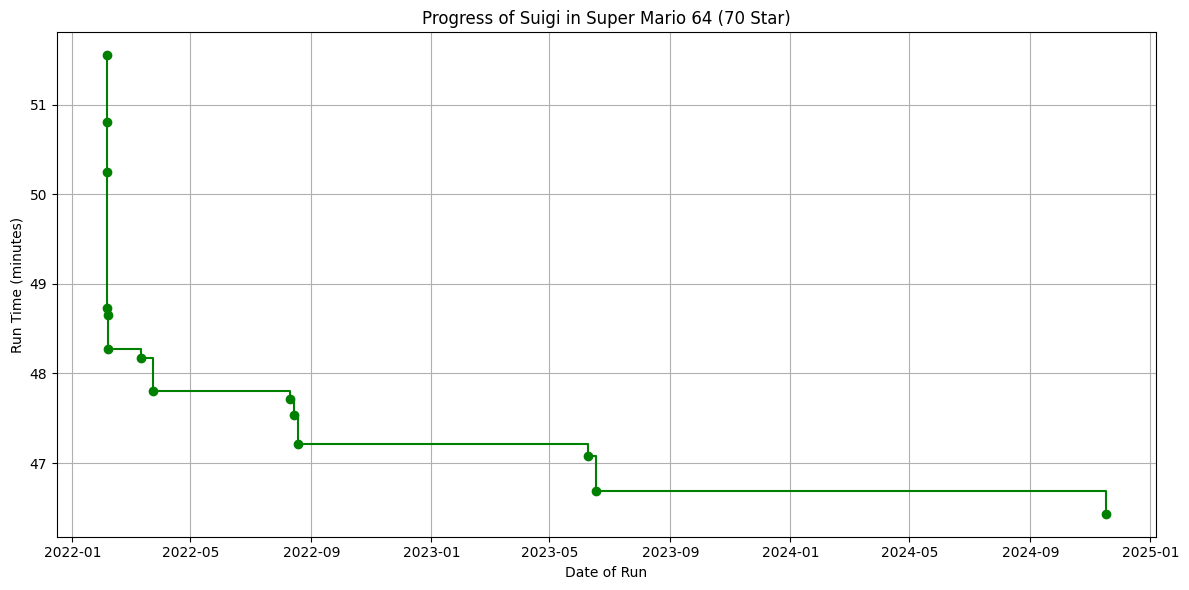

In [8]:
# Prepare data for graphing
df['date'] = pd.to_datetime(df['date'])
df.sort_values('date', inplace=True)
# Create a plot to visualize the player's progress
plt.figure(figsize=(12, 6))
plt.step(df['date'], df['time'], marker='o', linestyle='-', color='green', where='post')
plt.title(f'Progress of {username} in Super Mario 64 (70 Star)')
plt.xlabel('Date of Run')
plt.ylabel('Run Time (minutes)')
plt.grid(True)
plt.tight_layout()
plt.show()

## 3. Graphing a World Record Progression

This code fetches data from the Speedrun\.com API for Mario Kart Wii's 32 Tracks (No Skips) category, accumulates the dates and runtimes of verified runs, and identifies the progression of the world record over time. It then sorts the data and extracts the relevant dates and runtimes to graph the progression of this world record category.

### Finding the Parameter IDs

To begin, we will find the game and category IDs for Mario Kart Wii's 32 Tracks (No Skips) category. Using the `mkw` code found in the URL to the game's page on <a href="https://www.speedrun.com/mkw" target="_blank">Speedrun.com</a>, we can access the game ID and category data.

In [9]:
# Game identifier for Mario Kart Wii
game = 'mkw'  

try:
    response = requests.get(
        f"{base_url}/games/{game}?embed=categories.variables",
        headers=headers
    )
    response.raise_for_status()
    data = response.json()['data']

    game_title = data['names']['international']
    game_id = data['id']
    print(f"Game ID for {game_title} is '{game_id}'")

    print(f"Categories for {game_title}:")
    for category in data['categories']['data']:
        print(f"{category['id']} : {category['name']}")
except requests.exceptions.HTTPError as e:
    print(f"Error retrieving data {e}")
    data = {}

Game ID for Mario Kart Wii is 'l3dxogdy'
Categories for Mario Kart Wii:
wk68zp21 : 32 Tracks
7kj6mz23 : Nitro Tracks
xk9v3gd0 : Retro Tracks
7kjzwjnd : 100%
q25oz7gk : Mushroom Cup
jdrqy7lk : Flower Cup
jdz3xv62 : Star Cup
02qg6l9d : Special Cup
824xzrnd : Shell Cup
9d8pzglk : Banana Cup
xd1rz7wk : Leaf Cup
zd30z7rd : Lightning Cup


In the code above, we set the game ID for Mario Kart Wii and printed the category ID for every category. Since we are looking at the 32 Tracks category, we set the category ID below. Since we wish to further filter the category to include only No Skips runs, we must find the value and choice IDs.

In [10]:
category_id = 'wk68zp21'

try:
    response = requests.get(
        f"{base_url}/categories/{category_id}/variables",
        headers=headers
    )
    response.raise_for_status()
    data = response.json()['data']
    # Print the value IDs and names
    for idx, var in enumerate(data):
        print(f"{var['id']} : {var['name']}")
        pprint(var['values']['choices'])
        print()
except requests.exceptions.HTTPError as e:
    print(f"Error retrieving data {e}")
    data = {}

j84rwjl9 : Skips
{'81p4xxg1': 'Skips', 'xqk9zzn1': 'No Skips'}

wlez0kl6 : Items (32 Tracks)
{'4qyrv62l': 'Aggressive Items',
 '814k220l': 'Balanced Items',
 'gq797gvl': 'Strategic Items',
 'p12o227l': 'No Items'}

5ly9mjn4 : Character
{'013kzdq5': 'Koopa Troopa',
 '0q5wdmqp': 'Luigi',
 '21d804le': 'King Boo',
 '21g0mnqz': 'Waluigi',
 '4lx2m212': 'Peach',
 '4qy20417': 'Funky Kong',
 '5leyp51o': 'Mario',
 '5lm37j1v': 'Baby Daisy',
 '5q8vygld': 'Rosalina',
 '810n2wqv': 'Baby Mario',
 '810n4wqv': 'Mii',
 '814mr01d': 'Daisy',
 '81pkrgl7': 'Diddy Kong',
 '81w26o14': 'Toad',
 '9qjmpeq4': 'Baby Luigi',
 'gq738vlp': 'Wario',
 'jq6o83qm': 'Baby Peach',
 'jqz2jgqp': 'Donkey Kong',
 'klrkgj1p': 'Bowser',
 'mlnvx01p': 'Dry Bowser',
 'p12jg7qx': 'Birdo',
 'rqv2j716': 'Dry Bones',
 'xqkwpnq9': 'Bowser Jr.',
 'z19e00q4': 'Yoshi',
 'zqoezply': 'Toadette'}

wl35p9n1 : Vehicle
{'013w22dq': 'Flame Runner',
 '013w2vdq': 'Bullet Bike',
 '0q5x22m1': 'Spear',
 '0q5x2om1': 'Magikruiser',
 '21dv2241': 'Zip Zip

In [11]:
value_id = 'j84rwjl9'
choice_id = 'xqk9zzn1'
offset = 0
dates_runtimes = []
if game_id and category_id:
    while True:
        params = {
            'game': game_id,
            'category': category_id,
            'status': 'verified',
            'max': 200,
            'offset': offset
        }
        try:
            response = requests.get(
                f"{base_url}/runs",
                headers=headers,
                params=params
            )
            response.raise_for_status()
            data = response.json()
            sleep(1)
            if not data['data']:
                break
            offset += 200
            for run in data['data']:
                date = run.get("date", None)
                if not date or run['values'][value_id] != choice_id:
                    continue  # Skip if the date is not available
                runtime = run['times']['primary_t'] / 60
                date = datetime.strptime(date, "%Y-%m-%d")
                dates_runtimes.append((date, runtime))
        except requests.exceptions.HTTPError as e:
            print(f"Error retrieving data {e}")
            break
else:
    print("Game or category not found")

# Sort the list of (date, runtime) tuples by date
dates_runtimes.sort()

# Find the world record progression
wr_dates_runtimes = [dates_runtimes[0]]
for run in dates_runtimes[1:]:
    if run[1] < wr_dates_runtimes[-1][1]:
        wr_dates_runtimes.append(run)

# Unzip the list of world record (date, runtime) tuples into separate lists
dates, runtimes = zip(*wr_dates_runtimes)

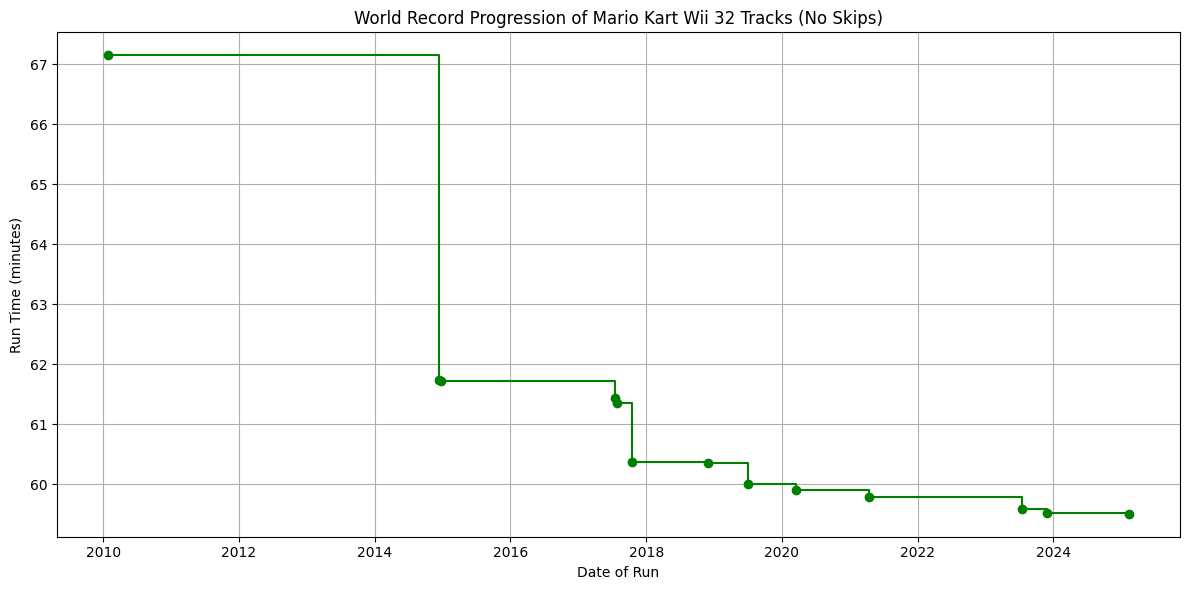

In [12]:
# Create a plot to visualize the world record progression
plt.figure(figsize=(12, 6))
plt.step(dates, runtimes, marker='o', linestyle='-', color='green', where='post')
plt.title(f'World Record Progression of Mario Kart Wii 32 Tracks (No Skips)')
plt.xlabel('Date of Run')
plt.ylabel('Run Time (minutes)')
plt.grid(True)
plt.tight_layout()
plt.show()